Project 2 Simpililearn
Moviens - You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Import Right Libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

•	Import the three datasets

Movie Data base in movies_df

In [3]:
movies_df = pd.read_csv('D:\Alok-OneDrive\OneDrive\Knowledge Center\AI - ML\Python\Examples\Projects\\movies.dat', encoding='ISO-8859-1', sep='::',  engine='python',
    names=['MovieID','Title','Genres'], header=None)
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Users Data base in users_df

In [4]:
users_df = pd.read_csv('D:\Alok-OneDrive\OneDrive\Knowledge Center\AI - ML\Python\Examples\Projects\\users.dat', encoding='ISO-8859-1', sep='::',engine='python',
    names=['UserID','Gender','Age', 'Occupation', 'zip-code'], header=None)
users_df.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Ratings Data base in ratings_df

In [5]:
ratings_df = pd.read_csv('D:\Alok-OneDrive\OneDrive\Knowledge Center\AI - ML\Python\Examples\Projects\\ratings.dat', encoding='ISO-8859-1', sep='::', engine='python',
    names=['UserID','MovieID','Rating', 'Timestamp'], header=None)
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


•	Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

First merging on Common field MovieID on Movies & Ratings database

In [6]:
Master_df = pd.merge(movies_df, ratings_df,
    on='MovieID')
Master_df.info()
Master_df.head()
Master_df = Master_df[['MovieID', 'Title', 'UserID', 'Rating']]
Master_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MovieID    1000209 non-null  int64 
 1   Title      1000209 non-null  object
 2   Genres     1000209 non-null  object
 3   UserID     1000209 non-null  int64 
 4   Rating     1000209 non-null  int64 
 5   Timestamp  1000209 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


,MovieID,Title,UserID,Rating
0,1,Toy Story (1995),1,5
1,1,Toy Story (1995),6,4
2,1,Toy Story (1995),8,4
3,1,Toy Story (1995),9,5
4,1,Toy Story (1995),10,5


Now merging on Common field MovieID on Master database on UserID

In [7]:
Master_df = pd.merge(Master_df, users_df,
    on='UserID')
Master_df.info()
Master_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Rating      1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   zip-code    1000209 non-null  object
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


,MovieID,Title,UserID,Rating,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),1,5,F,1,10,48067
1,48,Pocahontas (1995),1,5,F,1,10,48067
2,150,Apollo 13 (1995),1,5,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10,48067
4,527,Schindler's List (1993),1,5,F,1,10,48067


Rearranged the Master database as per the requirement

In [8]:
# Get the DataFrame column names as a list
clist = list(Master_df.columns)
Master_df.reindex(columns=['MovieID',
 'Title',
 'UserID',
 'Age', 'Gender',
 'Occupation',
 'Rating' ])
Master_df.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),1,5,F,1,10,48067
1,48,Pocahontas (1995),1,5,F,1,10,48067
2,150,Apollo 13 (1995),1,5,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10,48067
4,527,Schindler's List (1993),1,5,F,1,10,48067


•	Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution
These graphs are made on Master database that is currently created

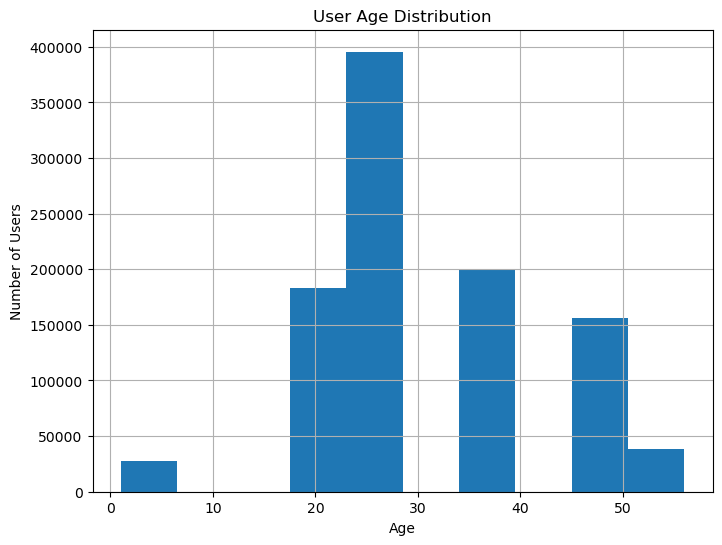

In [9]:
plt.figure(figsize=(8,6))
Master_df.Age.hist()
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

•	Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
o	These graphs are made on the Master database that is just created
6.	User rating of the movie “Toy Story”


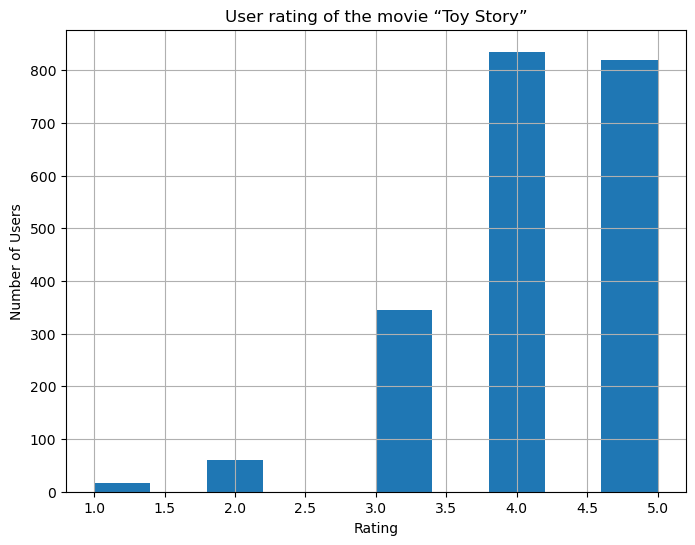

In [10]:
plt.figure(figsize=(8,6))
movies_grouped = Master_df.groupby('Title')
toy_story = movies_grouped.get_group('Toy Story (1995)')
toy_story['Rating'].hist()
plt.title('User rating of the movie “Toy Story”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: MovieID, dtype: int64

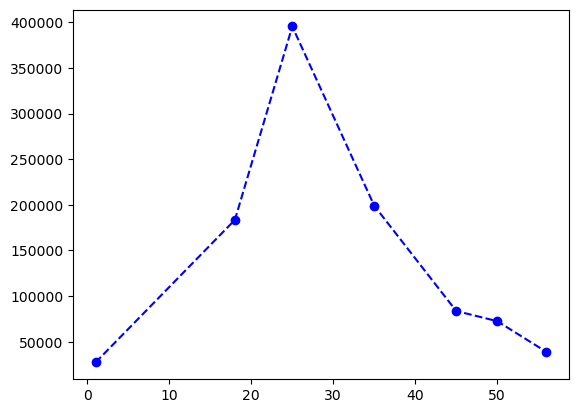

In [11]:
#User rating of the movie “Toy Story”
Master_df[Master_df.Title == "Toy Story (1995)"]

plt.plot(Master_df.groupby("Age")["MovieID"].count(),'--bo')
Master_df.groupby("Age")["MovieID"].count()

In [12]:
Master_df.groupby("Age")["MovieID"].count().describe()

count         7.000000
mean     142887.000000
std      129954.446357
min       27211.000000
25%       55635.000000
50%       83633.000000
75%      191269.500000
max      395556.000000
Name: MovieID, dtype: float64

•	Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
o	These graphs are made on the Master database that is just created
7.	Top 25 movies by viewership rating

In [13]:
rating_avg = Master_df.groupby('Title')['Rating'].mean()
rating_avg.head()
rating_avg = rating_avg.sort_values(ascending=False)
rating_avg[0:25]


Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [14]:
rating_avg_count = pd.DataFrame(data=rating_avg)
rating_avg_count['number_of_ratings'] = pd.DataFrame(rating_avg_count)
rating_avg_count.head()


,Rating,number_of_ratings
Title,,
Ulysses (Ulisse) (1954),5.0,5.0
Lured (1947),5.0,5.0
Follow the Bitch (1998),5.0,5.0
Bittersweet Motel (2000),5.0,5.0
Song of Freedom (1936),5.0,5.0


<Axes: ylabel='Title'>

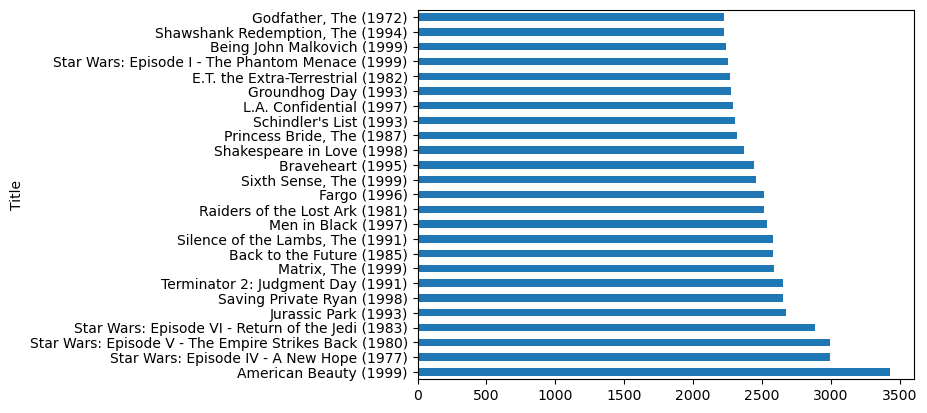

In [15]:
#Top 25 movies by viewership rating

res = Master_df.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh")

•	Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
o	These graphs are made on the Master database that is just created
8.	Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [16]:
user_2696 = Master_df[Master_df['UserID'] == 2696]
user_2696

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,zip-code
991035,350,"Client, The (1994)",2696,3,M,25,7,24210
991036,800,Lone Star (1996),2696,5,M,25,7,24210
991037,1092,Basic Instinct (1992),2696,4,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),2696,3,M,25,7,24210
991039,1258,"Shining, The (1980)",2696,4,M,25,7,24210
991040,1270,Back to the Future (1985),2696,2,M,25,7,24210
991041,1589,Cop Land (1997),2696,3,M,25,7,24210
991042,1617,L.A. Confidential (1997),2696,4,M,25,7,24210
991043,1625,"Game, The (1997)",2696,4,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),2696,2,M,25,7,24210


,MovieID,Title,UserID,Rating,Gender,Age,Occupation,zip-code
991035,350,"Client, The (1994)",2696,3,M,25,7,24210
991036,800,Lone Star (1996),2696,5,M,25,7,24210
991037,1092,Basic Instinct (1992),2696,4,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),2696,3,M,25,7,24210
991039,1258,"Shining, The (1980)",2696,4,M,25,7,24210
991040,1270,Back to the Future (1985),2696,2,M,25,7,24210
991041,1589,Cop Land (1997),2696,3,M,25,7,24210
991042,1617,L.A. Confidential (1997),2696,4,M,25,7,24210
991043,1625,"Game, The (1997)",2696,4,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),2696,2,M,25,7,24210


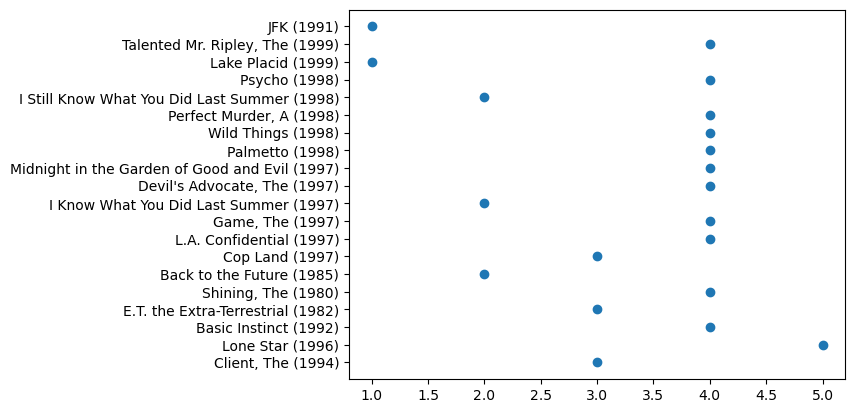

In [17]:
res = Master_df[Master_df.UserID == 2696]
plt.scatter(y=res.Title, x=res.Rating)
res

•	Feature Engineering:
    Use column genres:
Find out all the unique genres


In [18]:
movies_df.head()


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
movies_df['Genres'].value_counts().head()

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Name: Genres, dtype: int64

In [20]:
movies_df['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [21]:
#However these are not not unique in terms of genre. It is showing the combines unique genre

In [22]:
Master_df.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),1,5,F,1,10,48067
1,48,Pocahontas (1995),1,5,F,1,10,48067
2,150,Apollo 13 (1995),1,5,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10,48067
4,527,Schindler's List (1993),1,5,F,1,10,48067


In [23]:
#Joining the dataset
result = pd.merge(Master_df, movies_df,  how="left",  on='MovieID')
result.head()
result.columns
result = result[['MovieID', 'Title_x', 'UserID', 'Rating', 'Gender', 'Age', 'Occupation','Genres']]
result.head()
result.rename(columns = {'Title_x':'Title'}, inplace = True)
result.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,Genres
0,1,Toy Story (1995),1,5,F,1,10,Animation|Children's|Comedy
1,48,Pocahontas (1995),1,5,F,1,10,Animation|Children's|Musical|Romance
2,150,Apollo 13 (1995),1,5,F,1,10,Drama
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10,Action|Adventure|Fantasy|Sci-Fi
4,527,Schindler's List (1993),1,5,F,1,10,Drama|War


Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

Creating dummies for each possible genre, such as Sci-Fi or Drama, and having a single column for each. Creating dummies means creating 0s and 1s 



In [24]:
dummies = result['Genres'].str.get_dummies()
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
tidy_movie_ratings = (pd.concat([result, dummies], axis=1)
                       .drop([ "Genres"], axis=1)
                )

tidy_movie_ratings.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,F,1,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,5,F,1,10,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,5,F,1,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,5,F,1,10,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Now need to add column Year
The year is the last 6 from left in Movie Title. 


In [26]:
tidy_movie_ratings["Year"] = tidy_movie_ratings["Title"].str[-5:-1]
tidy_movie_ratings["movie_title"] = tidy_movie_ratings["Title"].str[:-7]

In [27]:

tidy_movie_ratings.reset_index(inplace=True)
tidy_movie_ratings=tidy_movie_ratings[['MovieID', 'Title', 'UserID', 'Rating', 'Gender', 'Age',
       'Occupation', 'Action', 'Adventure', 'Animation', "Children's",
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Year']]


In [28]:
tidy_movie_ratings.columns

Index(['MovieID', 'Title', 'UserID', 'Rating', 'Gender', 'Age', 'Occupation',
       'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Year'],
      dtype='object')

In [29]:
tidy_movie_ratings.head()
tidy_movie_ratings.shape

(1000209, 26)

Determine the features affecting the ratings of any particular movie.
Removing few parameters like Title, User Id, Movie Id which  

In [30]:
X_feature = tidy_movie_ratings[['Gender', 'Age', 'Occupation',
       'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Year']]
X_feature.shape

(1000209, 22)

In [31]:
X_feature.head()

,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,F,1,10,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,F,1,10,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1995
2,F,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,F,1,10,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1977
4,F,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1993


In [32]:

Y_target = tidy_movie_ratings[['Rating']]

In [33]:
#find the correlation using 'corr()' function.
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = tidy_movie_ratings.corr()
data_corr

C:\Users\aranj\AppData\Local\Temp\ipykernel_17684\3636535412.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = tidy_movie_ratings.corr()


,MovieID,UserID,Rating,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,1.000000,-0.017739,-0.064042,0.027575,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,0.061667,...,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.003940
UserID,-0.017739,1.000000,0.012303,0.034688,-0.026698,-0.002023,-0.000683,-0.007665,-0.004862,-0.003651,...,0.002212,0.004701,-0.001392,-0.000222,0.004334,0.006834,-0.003283,-0.001107,0.003502,0.004114
Rating,-0.064042,0.012303,1.000000,0.056869,0.006753,-0.047633,-0.036718,0.019670,-0.039829,-0.039622,...,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311
Age,0.027575,0.034688,0.056869,1.000000,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,...,-0.024222,0.033495,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177
Occupation,0.008585,-0.026698,0.006753,0.078371,1.000000,0.018347,0.014309,-0.003834,-0.006906,-0.006149,...,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924
Action,-0.042046,-0.002023,-0.047633,-0.030975,0.018347,1.000000,0.374961,-0.110294,-0.141314,-0.268092,...,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242
Adventure,-0.082413,-0.000683,-0.036718,-0.016730,0.014309,0.374961,1.000000,0.004732,0.098283,-0.124960,...,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964
Animation,-0.014177,-0.007665,0.019670,-0.047020,-0.003834,-0.110294,0.004732,1.000000,0.576204,0.018544,...,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908
Children's,-0.071589,-0.004862,-0.039829,-0.052858,-0.006906,-0.141314,0.098283,0.576204,1.000000,0.058711,...,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269
Comedy,0.061667,-0.003651,-0.039622,-0.044046,-0.006149,-0.268092,-0.124960,0.018544,0.058711,1.000000,...,-0.006010,-0.101425,-0.093064,0.030566,-0.105346,0.112843,-0.187079,-0.299501,-0.127101,0.007927


In [34]:
new_cor = data_corr[0:1]
new_cor

,MovieID,UserID,Rating,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,1.0,-0.017739,-0.064042,0.027575,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,0.061667,...,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.00394


In [35]:
rslt_df = data_corr.sort_values(by = 'MovieID', axis = 1, ascending = False)
rslt_df = rslt_df[0:1]

<Axes: >

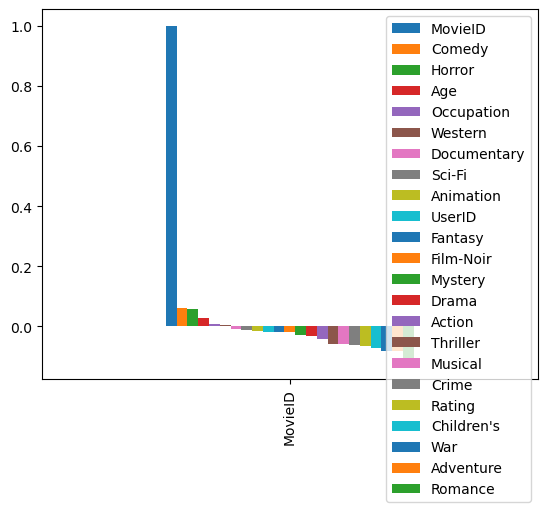

In [36]:
rslt_df.plot.bar()


In [37]:
#The 3 factors affecting the rating are: Genre, Age & Occupation
#Overall - Rating is affected by 2 Genres - Horror & Comedy
#Genre - (2 of the Sub genre had been highest)
#Followed by Age	Occupation

In [38]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
#Split the dataset (by default, 75% is the training data and 25% is the testing data)
#by default takin 75%-25% split
#Cross_validation got away from python 2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_feature, Y_target, random_state=1)


In [39]:
number = LabelEncoder()
x_train.Gender = number.fit_transform(x_train["Gender"].astype("str"))
x_test.Gender = number.fit_transform(x_test["Gender"].astype("str"))
y_train = number.fit_transform(y_train.astype("int"))
y_test = number.fit_transform(y_test.astype("int"))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#Verify if the training and testing datasets are split correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750156, 22)
(750156,)
(250053, 22)
(250053,)


Logistic regression is best used for predicting categorical data

need to do logistic regression on the training data so we can see how well our test data does the prediction

The dataset kept throwing off a non-convergence error where max iterations had been reached. I used the code below to increase the max iter.

However, for test purpose showing how linear regression model witll fail

In [41]:
#Create a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
y_pred = linreg.predict(x_test)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [ ]:
print(
    'y-intercept: ',
    linreg.intercept_
)
print(
    'Beta coefficients: ',
    linreg.coef_
)


In [ ]:
from sklearn import metrics

print(
    'Mean Abs Error  MAE: ',
    metrics.mean_absolute_error(y_test, y_pred)
)
print(
    'Mean Sq Error  MSE: ',
    metrics.mean_squared_error(y_test, y_pred)
)
print(
    'Root Mean Sq Error RMSE:',
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

As we see the linear model is not the right model for this dataset
Develop an appropriate model to predict the movie ratings

In [42]:
# Create a logistic regression model using the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#Make predictions using the testing set
y_pred = logreg.predict(x_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [44]:
#Evaluate the accuracy of your model
print(logreg.intercept_)
print(logreg.coef_)
from sklearn import metrics
import numpy as np
print(metrics.mean_squared_error(y_test, y_pred))
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

[-3.72911239e-05 -5.65842971e-05 -5.45592491e-05  2.62081779e-05
  1.22226492e-04]
[[ 1.23526965e-04 -1.68736754e-02 -2.44701381e-03  6.74231056e-04
   2.97300227e-04 -1.42370546e-04  5.51223708e-04  4.50621745e-04
  -4.11938206e-04 -5.46368622e-05 -2.51119580e-03  9.37765430e-05
  -2.42825115e-04  1.49548953e-03 -9.67548776e-05 -1.70485099e-04
  -6.36031008e-04  7.20702191e-04 -1.87337315e-04 -4.60275660e-04
  -2.07144237e-05 -2.93375828e-04]
 [ 6.36329084e-04 -2.91680233e-03  1.42350211e-04  1.16542314e-03
   6.95777556e-04 -3.95473120e-04  2.22067412e-04  7.89246682e-04
  -3.71832462e-04 -1.23840425e-04 -2.82996117e-03  2.39911608e-04
  -3.59845550e-04  1.17688745e-03 -2.30021381e-04 -8.79737592e-05
  -1.73466791e-04  1.08272938e-03  2.45195957e-04 -8.14791688e-04
  -8.20160591e-05 -1.72433042e-04]
 [ 4.59463515e-04  4.91744717e-03  3.74223100e-04  1.06257850e-03
   9.49359364e-04 -8.53344156e-05  5.05300083e-04  1.23232252e-03
  -4.27855569e-04 -2.10884523e-04 -2.59616289e-03  3.17

0.3506976520977553

In [45]:
#Print the first 30 actual and predicted responses
print('Actual : ', y_test[0:30])
print('Predicted :', y_pred[0:30])

Actual :  [3 4 2 4 3 2 2 2 3 1 4 0 3 4 2 3 3 2 4 4 0 4 2 3 4 3 0 3 4 2]
Predicted : [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
